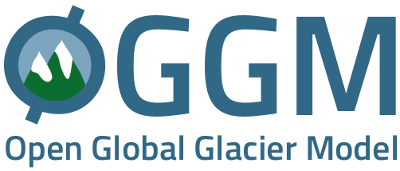

# ELA changes and response time

This notebook was used to create the idealized "response time" plots used for outreach and educations. See [glacier-graphics](https://github.com/OGGM/glacier-graphics). 

In [1]:
# The commands below are just importing the necessary modules and functions
# Plot defaults
%matplotlib inline
import matplotlib.pyplot as plt
# Scientific packages
import numpy as np
# Constants
from oggm import cfg
cfg.initialize()
# OGGM models
from oggm.core.massbalance import LinearMassBalance
from oggm.core.flowline import FluxBasedModel, RectangularBedFlowline, TrapezoidalBedFlowline, ParabolicBedFlowline
# There are several solvers in OGGM core. We use the default one for this experiment
FlowlineModel = FluxBasedModel
import os
homedir = os.path.expanduser('~')

2018-12-12 14:04:38: oggm.cfg: Using configuration file: /home/zora/Dokumente/git/oggm/oggm/params.cfg


### Bed 

In [2]:
# Bed rock, linearily decreasing from 3400m altitude to 1400m, in 200 steps
nx = 200
bed_h = np.linspace(3400, 1400, nx)
# Let's set the model grid spacing to 100m (needed later)
map_dx = 100
# The units of widths is in "grid points", i.e. 3 grid points = 300 m in our case
widths = np.zeros(nx) + 3.
# Define our bed
init_flowline = RectangularBedFlowline(surface_h=bed_h, bed_h=bed_h, widths=widths, map_dx=map_dx)

### Spin-up run

We run the glacier up to equilibrium first.

In [3]:
# ELA at 3000m a.s.l., gradient 4 mm m-1
mb_model = LinearMassBalance(3000, grad=4)
spinup_model = FlowlineModel(init_flowline, mb_model=mb_model, y0=0.)
# Run
spinup_model.run_until(1200)

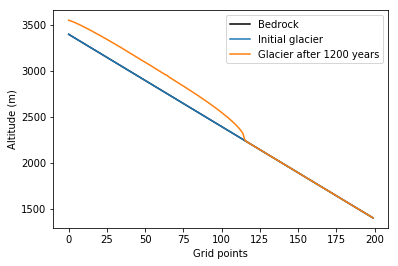

In [4]:
# Plot the initial conditions first:
plt.plot(init_flowline.bed_h, color='k', label='Bedrock')
plt.plot(init_flowline.surface_h, label='Initial glacier')
# The get the modelled flowline (model.fls[-1]) and plot it's new surface
plt.plot(spinup_model.fls[-1].surface_h, label='Glacier after {:.0f} years'.format(spinup_model.yr))
plt.xlabel('Grid points')
plt.ylabel('Altitude (m)')
plt.legend(loc='best');

### Model run

We make a model run with three ELA stages:

In [5]:
# Set-up
mb_model = LinearMassBalance(3000, grad=4)
model = FlowlineModel(spinup_model.fls, mb_model=mb_model, y0=0.)

# Time
yrs = np.arange(0, 901, 5, dtype=np.float32)
nsteps = len(yrs)

# Output containers
ela = np.zeros(nsteps)
length = np.zeros(nsteps)
area = np.zeros(nsteps)
volume = np.zeros(nsteps)

# Loop
current_ela = 3000.
for i, yr in enumerate(yrs):
    model.run_until(yr)
    if yr >= 100:
        current_ela = 2800
        model.mb_model = LinearMassBalance(current_ela, grad=4)
    if yr >= 500:
        current_ela = 3200
        model.mb_model = LinearMassBalance(current_ela, grad=4)
    ela[i] = current_ela
    length[i] = model.length_m
    area[i] = model.area_km2
    volume[i] = model.volume_km3

## Plots 

In [6]:
from matplotlib import gridspec
from matplotlib.transforms import blended_transform_factory

In [7]:
# If you want to make "xkcd looking" plots - you need specific fonts for this to work though
plt.xkcd();

/home/zora/miniconda3/envs/oggm_env/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


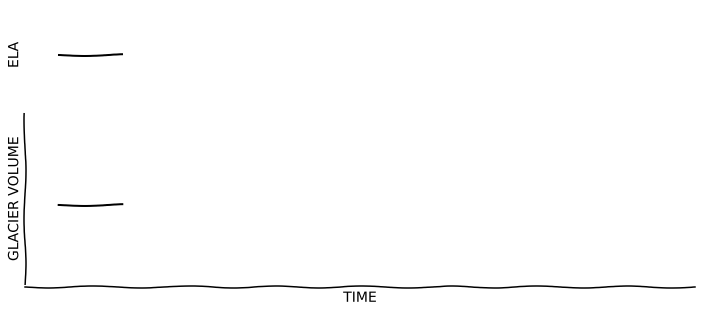

In [8]:
# Grid
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(3, 1)

# Plot 1
ax = plt.subplot(gs[0, :])

ax.plot(yrs[yrs<100], ela[yrs<100], 'k');
ax.set_xlim([-50, 950])
ax.set_ylim([2750, 3250])

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none'); ax.spines['left'].set_color('none')
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('ELA')

# Plot 2
ax = plt.subplot(gs[1:, :])

ax.plot(yrs[yrs<100], volume[yrs<100], 'k');
ax.set_ylim([0.2, 1.1])
ax.set_xlim([-50, 950])

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
plt.xticks([]); plt.yticks([])
ax.set_xlabel('TIME')
ax.set_ylabel('GLACIER VOLUME');

plt.savefig(os.path.join(homedir, 'tau_01.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(homedir, 'tau_01.png'), bbox_inches='tight', dpi=150)

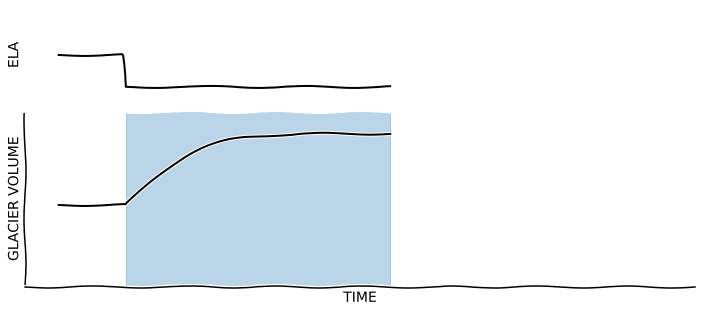

In [9]:
# Grid
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(3, 1)

# Plot 1
ax = plt.subplot(gs[0, :])

ax.plot(yrs[yrs<500], ela[yrs<500], 'k');
ax.set_xlim([-50, 950])
ax.set_ylim([2750, 3250])

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none'); ax.spines['left'].set_color('none')
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('ELA')

# Plot 2
ax = plt.subplot(gs[1:, :])

ax.plot(yrs[yrs<500], volume[yrs<500], 'k');
ax.set_ylim([0.2, 1.1])
ax.set_xlim([-50, 950])

trans = blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(yrs, 0, 1, where=ela<3000, alpha=0.3, transform=trans, color='C0')

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
plt.xticks([]); plt.yticks([])
ax.set_xlabel('TIME')
ax.set_ylabel('GLACIER VOLUME');

plt.savefig(os.path.join(homedir, 'tau_02.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(homedir, 'tau_02.png'), bbox_inches='tight', dpi=150)

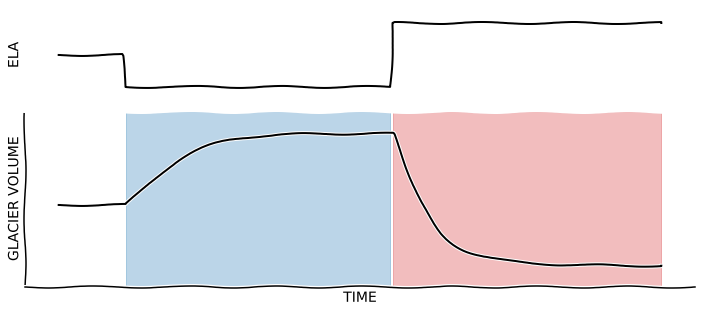

In [10]:
# Grid
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(3, 1)

# Plot 1
ax = plt.subplot(gs[0, :])

ax.plot(yrs, ela, 'k');
ax.set_xlim([-50, 950])
ax.set_ylim([2750, 3250])

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none'); ax.spines['left'].set_color('none')
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('ELA')

# Plot 2
ax = plt.subplot(gs[1:, :])

ax.plot(yrs, volume, 'k');
ax.set_ylim([0.2, 1.1])
ax.set_xlim([-50, 950])

trans = blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(yrs, 0, 1, where=ela<3000, alpha=0.3, transform=trans, color='C0')
ax.fill_between(yrs, 0, 1, where=ela>3000, alpha=0.3, transform=trans, color='C3')

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
plt.xticks([]); plt.yticks([])
ax.set_xlabel('TIME')
ax.set_ylabel('GLACIER VOLUME');

plt.savefig(os.path.join(homedir, 'tau_03.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(homedir, 'tau_03.png'), bbox_inches='tight', dpi=150)

In [11]:
# Compute the time constants in a bit of an intricate way
tl = 1 - 1 / np.e
y1 = yrs[np.where(volume >= (np.max(volume)-volume[0])*tl+volume[0])][0]
y2 =yrs[np.where(volume <= np.max(volume) - np.abs((np.max(volume)-np.min(volume))*tl))][0]

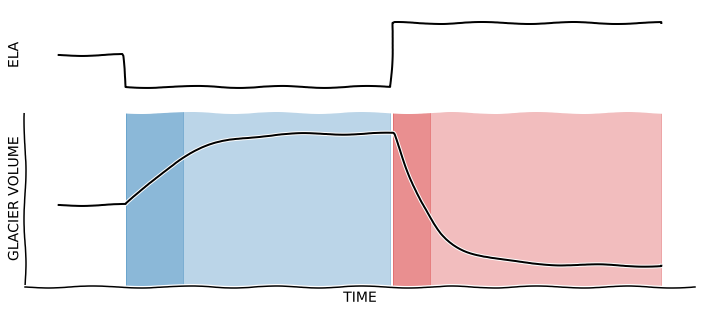

In [12]:
# Grid
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(3, 1)

# Plot 1
ax = plt.subplot(gs[0, :])

ax.plot(yrs, ela, 'k');
ax.set_xlim([-50, 950])
ax.set_ylim([2750, 3250])

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none'); ax.spines['left'].set_color('none')
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('ELA')

# Plot 2
ax = plt.subplot(gs[1:, :])

ax.plot(yrs, volume, 'k');
ax.set_ylim([0.2, 1.1])
ax.set_xlim([-50, 950])

trans = blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(yrs, 0, 1, where=ela<3000, alpha=0.3, transform=trans, color='C0')
ax.fill_between(yrs, 0, 1, where=ela>3000, alpha=0.3, transform=trans, color='C3')
ax.fill_between(yrs, 0, 1, where=((yrs>=100) & (yrs<=y1)), alpha=0.3, transform=trans, color='C0')
ax.fill_between(yrs, 0, 1, where=((yrs>=500) & (yrs<=y2)), alpha=0.3, transform=trans, color='C3')

ax.spines['right'].set_color('none'); ax.spines['top'].set_color('none')
plt.xticks([]); plt.yticks([])
ax.set_xlabel('TIME')
ax.set_ylabel('GLACIER VOLUME');

plt.savefig(os.path.join(homedir, 'tau_04.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(homedir, 'tau_04.png'), bbox_inches='tight', dpi=150)